# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Magdala Nurrahma
- **Email:** m010b4kx2380@bangkit.academy
- **ID Dicoding:** m010b4kx2380

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan bike sharing setiap musim?
- Berapa banyak jumlah pengguna terdaftar dan tidak terdaftar yang menggunakan bike sharing saat weekday?
- Bagaimana distribusi penggunaan bike sharing dalam seminggu?
- Apakah cuaca memengaruhi peminjaman bike sharing setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Meng-import semua Library yang dibutuhkan untuk menyelesaikan proyek submisi.

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('all_data.csv')
day_data.head()

,instant_x,dateday,season_x,year,month,hour,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,day_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [3]:
day_data.dtypes

instant_x         int64
dateday          object
season_x          int64
year              int64
month             int64
hour              int64
holiday_x         int64
weekday_x         int64
workingday_x      int64
weathersit_x      int64
temp_x          float64
atemp_x         float64
hum_x           float64
windspeed_x     float64
casual_x          int64
registered_x      int64
hour_count        int64
instant_y         int64
season_y          int64
holiday_y         int64
weekday_y         int64
workingday_y      int64
weathersit_y      int64
temp_y          float64
atemp_y         float64
hum_y           float64
windspeed_y     float64
casual_y          int64
registered_y      int64
day_count         int64
dtype: object

**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dateday       17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   year          17379 non-null  int64  
 4   month         17379 non-null  int64  
 5   hour          17379 non-null  int64  
 6   holiday_x     17379 non-null  int64  
 7   weekday_x     17379 non-null  int64  
 8   workingday_x  17379 non-null  int64  
 9   weathersit_x  17379 non-null  int64  
 10  temp_x        17379 non-null  float64
 11  atemp_x       17379 non-null  float64
 12  hum_x         17379 non-null  float64
 13  windspeed_x   17379 non-null  float64
 14  casual_x      17379 non-null  int64  
 15  registered_x  17379 non-null  int64  
 16  hour_count    17379 non-null  int64  
 17  instant_y     17379 non-null  int64  
 18  season_y      17379 non-nu

In [5]:
day_data.isnull().sum()

instant_x       0
dateday         0
season_x        0
year            0
month           0
hour            0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
hour_count      0
instant_y       0
season_y        0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
day_count       0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_data.describe()

,instant_x,season_x,year,month,hour,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,day_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [8]:
day_data.dropna(axis=0, inplace=True)

In [9]:
day_data.drop_duplicates(inplace=True)

In [10]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
datetime_columns = ["dateday"]

for column in datetime_columns:
  day_data[column] = pd.to_datetime(day_data[column])

day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   year          17379 non-null  int64         
 4   month         17379 non-null  int64         
 5   hour          17379 non-null  int64         
 6   holiday_x     17379 non-null  int64         
 7   weekday_x     17379 non-null  int64         
 8   workingday_x  17379 non-null  int64         
 9   weathersit_x  17379 non-null  int64         
 10  temp_x        17379 non-null  float64       
 11  atemp_x       17379 non-null  float64       
 12  hum_x         17379 non-null  float64       
 13  windspeed_x   17379 non-null  float64       
 14  casual_x      17379 non-null  int64         
 15  registered_x  17379 non-null  int64 

In [13]:
# Mengubah nama beberapa kolom
day_data.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

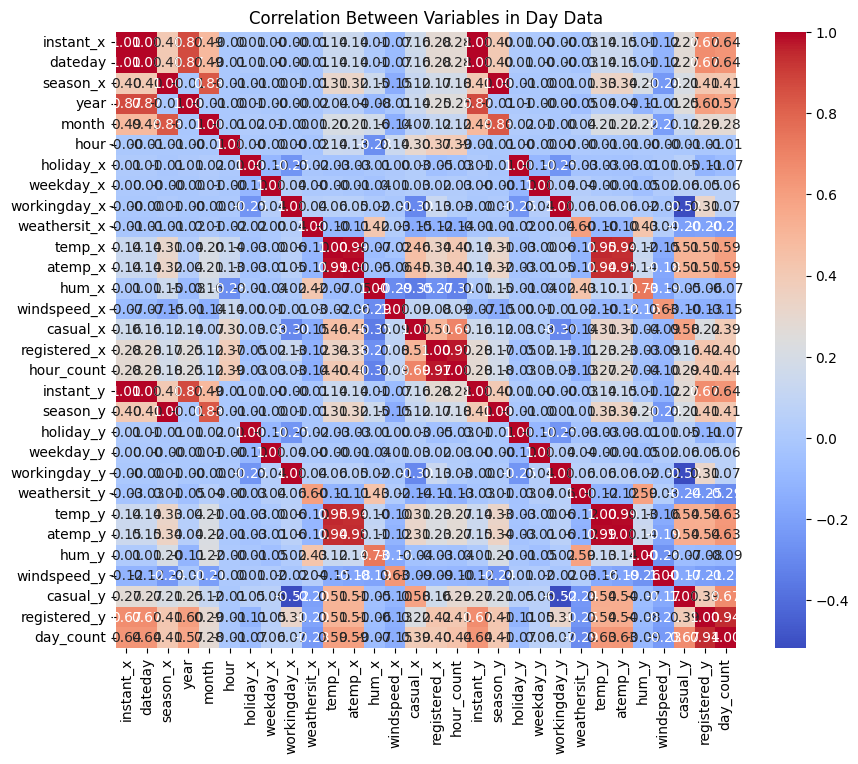

In [14]:
# Menampilkan korelasi antara variabel pada data day
plt.figure(figsize=(10, 8))
sns.heatmap(day_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables in Day Data')
plt.show()

In [16]:
day_data['season_y'] = day_data['season_y'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [17]:
day_data['season_y'] = day_data.season.astype('category')

AttributeError: 'DataFrame' object has no attribute 'season'

In [ ]:
day_data.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

In [29]:
day_data['weekday'] = day_data['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [30]:
# day_data['weekday'] = day_data.weekday.astype('category')

In [ ]:
day_data.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

In [32]:
day_data['month'] = day_data['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

In [33]:
day_data['month'] = day_data.month.astype('category')

In [ ]:
day_data.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

In [35]:
day_data['weathersit'] = day_data['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [36]:
day_data['weathersit'] = day_data.weathersit.astype('category')

In [ ]:
day_data.groupby(by='weathersit').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penggunaan bike sharing setiap musim?

In [ ]:
# Menghitung jumlah penggunaan bike sharing berdasarkan musim
season_usage = day_data.groupby('season')['count'].sum()

# Warna pada pie chart
colors = sns.color_palette('coolwarm', len(season_usage))

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_usage, labels=season_usage.index, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})

# Membuat Donut pie chart
circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(circle)

# Tambahkan judul dan background warna
plt.title('Penggunaan Bike Sharing Setiap Musim', fontsize=16, color='navy')
plt.gcf().set_facecolor('#f7f7f7')  # background chart
plt.show()

### Pertanyaan 2: Berapa banyak jumlah pengguna terdaftar dan tidak terdaftar yang menggunakan bike sharing saat weekday?

In [ ]:
# 2. Menghitung jumlah casual dan registered berdasarkan weekday
weekday_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
day_data['weekday_name'] = day_data['weekday'].map(weekday_mapping)

weekday_usage = day_data.groupby('weekday')[['casual', 'registered']].sum()

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_usage = weekday_usage.reindex(weekday_order)

# Membuat bar chart untuk casual dan registered users
plt.figure(figsize=(10, 6))
weekday_usage.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'])

# Menambahkan judul, label, dan background
plt.title('Pengguna Terdaftar dan Tidak Terdaftar Saat Weekday', fontsize=16, color='navy')
plt.xlabel('Weekday', fontsize=12, color='darkblue')
plt.ylabel('Jumlah Pengguna', fontsize=12, color='darkblue')
plt.gcf().set_facecolor('#e6f2ff')  # background chart

# Grid dan rotasi label axis x
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Pertanyaan 3: Bagaimana distribusi penggunaan bike sharing perbulannya dalam tahun 2011 dan 2012?

In [ ]:
# 3. Distribusi penggunaan bike sharing perbulan tahun 2011 dan 2012 
monthly_data = day_data.groupby(['year', 'month'])['count'].sum().unstack(level=0)
monthly_data.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(14, 7))
monthly_data.plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=8)

plt.title('Distribusi Penggunaan Bike Sharing per Bulan (2011-2012)', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.legend(['2011', '2012'], fontsize=10)

# Menambah colorful background
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.imshow(gradient, extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]],
           aspect='auto', zorder=0, alpha=0.2, cmap='coolwarm')

plt.tight_layout()
plt.show()

### Pertanyaan 4: Apakah cuaca memengaruhi peminjaman bike sharing setiap bulannya?

In [ ]:
# 4. Pengaruh cuaca terhadap peminjaman bike sharing setiap bulan 
weather_monthly = day_data.groupby(['month', 'weathersit'])['count'].mean().unstack()
weather_monthly.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(16, 8))
weather_monthly.plot(kind='bar', ax=ax, width=0.8)

plt.title('Pengaruh Cuaca terhadap Peminjaman Bike Sharing per Bulan', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Pengguna', fontsize=12)
plt.legend(['Cerah/Berawan Sebagian', 'Berkabut/Berawan', 'Salju/Hujan Ringan', 'Hujan Lebat'], fontsize=10, title='Kondisi Cuaca')
plt.xticks(rotation=45)

# Menambah gradient background
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.imshow(gradient, extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]],
           aspect='auto', zorder=0, alpha=0.2, cmap='rainbow')

plt.tight_layout()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2